In [2]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import os 
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import itertools

from multiprocessing import Pool


C:\Users\jhroe\AppData\Local\Temp\ipykernel_23036\1407334459.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [19]:


# date and cell cutoff
cutoff = 25

# specify paths

data_path = f'{os.getcwd()}/Data/'
file_path = f"{data_path}/distances/cell_distances_25px_20240506_allpatients.csv"
file_path2 = f"{data_path}/clustering/full_cd_clus_21_40_49.csv"

# output_path = f"{data_path}/frequencies/"
# comms = pd.read_csv(file_path2)[['agglomerateto_40', 'source_ID']]
comms = pd.read_csv(file_path2)

temp = pd.read_csv(file_path)
# temp
dists = temp[['Patient_ID','source_cluster', 'target_cluster', 'source_ID']]
dists_merged = pd.merge(dists, comms, on='source_ID', how='inner').rename(columns={'agglomerateto_40':'cluster'})

# dists_merged['Patient_ID' , 'source_ID', 'source_cluster', 'target_cluster']
dists_merged
# comms

,Patient_ID_x,source_cluster_x,target_cluster,source_ID,Patient_ID_y,source_cluster_y,Alt.MAC,B,Cancer,Cl_Mac,...,T_other,Tc,Th,Treg,Unknown,cluster,agglomerateto_21,cluster,agglomerateto_49,surv_5y
0,LUAD_D223,Cancer,Cancer,D223_1133,LUAD_D223,Cancer,0.0,0.0,0.875000,0.000000,...,0.0,0.125000,0.000000,0.0,0.000000,105,9,19,19,1
1,LUAD_D223,Cancer,Cancer,D223_2,LUAD_D223,Cancer,0.0,0.0,0.750000,0.250000,...,0.0,0.000000,0.000000,0.0,0.000000,49,9,16,4,1
2,LUAD_D223,Cancer,Cancer,D223_2307,LUAD_D223,Cancer,0.0,0.0,0.666667,0.222222,...,0.0,0.111111,0.000000,0.0,0.000000,23,3,6,6,1
3,LUAD_D223,Cancer,Cancer,D223_3639,LUAD_D223,Cancer,0.0,0.0,0.785714,0.000000,...,0.0,0.142857,0.071429,0.0,0.000000,15,9,4,9,1
4,LUAD_D223,Cl MAC,Cancer,D223_4,LUAD_D223,Cl_Mac,0.0,0.0,0.777778,0.111111,...,0.0,0.111111,0.000000,0.0,0.000000,84,9,4,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17104169,LUAD_D165,Cancer,Cancer,D165_3084,LUAD_D165,Cancer,0.0,0.0,0.857143,0.000000,...,0.0,0.000000,0.000000,0.0,0.142857,125,9,17,17,1
17104170,LUAD_D165,Cancer,Cancer,D165_3086,LUAD_D165,Cancer,0.0,0.0,0.714286,0.000000,...,0.0,0.000000,0.000000,0.0,0.285714,111,9,17,17,1
17104171,LUAD_D165,Cancer,Cancer,D165_909,LUAD_D165,Cancer,0.0,0.0,0.545455,0.090909,...,0.0,0.000000,0.000000,0.0,0.181818,60,3,8,24,1
17104172,LUAD_D165,Cancer,Cancer,D165_926,LUAD_D165,Cancer,0.0,0.0,0.416667,0.083333,...,0.0,0.000000,0.083333,0.0,0.250000,44,3,39,39,1


In [20]:
comms

,Patient_ID,source_ID,source_cluster,Alt.MAC,B,Cancer,Cl_Mac,Cl_Mo,DC,Endothelial,...,T_other,Tc,Th,Treg,Unknown,cluster,agglomerateto_21,agglomerateto_40,agglomerateto_49,surv_5y
0,LUAD_D001,D001_0,Cancer,0.166667,0.0,0.166667,0.166667,0.0,0.0,0.000000,...,0.000000,0.166667,0.333333,0.000000,0.000000,1,7,27,27,1
1,LUAD_D001,D001_1,Tc,0.000000,0.0,0.285714,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.285714,0.000000,0.428571,2,17,34,34,1
2,LUAD_D001,D001_10,Th,0.000000,0.0,0.363636,0.272727,0.0,0.0,0.000000,...,0.000000,0.181818,0.090909,0.000000,0.000000,3,5,5,47,1
3,LUAD_D001,D001_100,Cancer,0.000000,0.0,0.714286,0.000000,0.0,0.0,0.142857,...,0.000000,0.000000,0.000000,0.000000,0.142857,4,9,7,3,1
4,LUAD_D001,D001_1000,Treg,0.000000,0.0,0.000000,0.083333,0.0,0.0,0.083333,...,0.083333,0.083333,0.250000,0.000000,0.333333,1,7,27,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637717,LUAD_D416,D416_995,Unknown,0.000000,0.0,0.166667,0.500000,0.0,0.0,0.000000,...,0.000000,0.000000,0.166667,0.000000,0.166667,44,3,39,39,1
1637718,LUAD_D416,D416_996,Cl_Mac,0.000000,0.0,0.400000,0.200000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.200000,72,3,3,1,1
1637719,LUAD_D416,D416_997,Cancer,0.000000,0.0,0.000000,0.333333,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.333333,0.333333,146,1,31,31,1
1637720,LUAD_D416,D416_998,Cl_Mac,0.000000,0.0,0.000000,0.333333,0.0,0.0,0.000000,...,0.000000,0.166667,0.333333,0.000000,0.166667,1,7,27,27,1


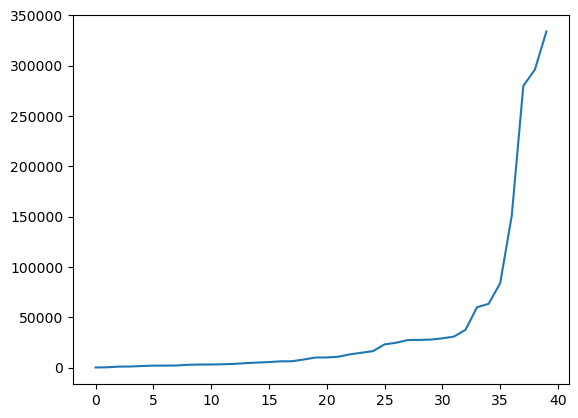

In [18]:
plt.plot(sorted(comms['agglomerateto_40'].value_counts()))

In [8]:
# set number of permutations
num_perms = 5
# Significance threshold
p_threshold = 0.01
np.random.seed(42)

# calculate mean number of celltype B in surrounding of celltype A's per treatment, ROI and community
def aggregate_histo(data):
    counts = data.groupby(by=['Patient_ID', 'cluster','source_ID', 'source_cluster', 'target_cluster']).size().reset_index(name='mean')
    means = counts.groupby(by=['Patient_ID', 'cluster','source_cluster', 'target_cluster'])['mean'].mean().reset_index()
    return means

# Shuffle the cell types B in a ROI to randomize the neighbours of cell type A
def shuffle_labels(data):
    shuffled_data = data.copy()
    new_dfs = []
    for treatment in shuffled_data['treatment'].unique():
        for roi in shuffled_data.loc[shuffled_data['treatment'] == treatment, 'ROI_ID'].unique():
            df = shuffled_data[(shuffled_data['treatment'] == treatment) & (shuffled_data['ROI_ID'] == roi)].copy()
            df['target_cluster'] = np.random.permutation(df['target_cluster'])
            new_dfs.append(df)
    new_df = pd.concat(new_dfs)
    return new_df


# Shuffle the data then obtain mean of number of neighbours per celltype
# Only use for permutation
def shuffle_and_aggregate(data):
    data_shuffled = shuffle_labels(data)
    return aggregate_histo(data_shuffled)


def calc_p_vals(dat_baseline, dat_perm, n_perm, p_thresh=0.01):
    # Merge data
    dat_perm = pd.merge(dat_perm, dat_baseline[['Patient_ID', 'cluster','source_cluster', 'target_cluster', 'mean']],
                        on=['Patient_ID', 'cluster','source_cluster', 'target_cluster'], suffixes=('_perm', '_obs'), how='left')

    # Replace NA values with 0
    dat_perm['mean_obs'].fillna(0, inplace=True)
    dat_perm_no_comm = dat_perm.drop(columns=['cluster'])
    dat_perm_res = dat_perm_no_comm.groupby(by=['Patient_ID','source_cluster', 'target_cluster', 'mean_obs'])['mean_perm'].mean().reset_index()

    # dat_perm_res = dat_perm.groupby(by=['treatment','ROI_ID', 'community','source_cluster', 'target_cluster', 'mean_obs'])['mean_perm'].mean().reset_index()

    # Initialize p-values list
    p_values = []

    # Iterate over each row of dat_perm
    for index, row in dat_perm.iterrows():
        count_obs = row['mean_obs']
        count_perm = row['mean_perm']

        # Statistical calculation
        if count_obs == 0:
            p_gt = 1
        else:
            p_gt = (np.sum(count_perm >= count_obs) + 1) / (n_perm + 1)
        p_lt = (n_perm - np.sum(count_perm > count_obs) + 1) / (n_perm + 1)

        # Direction calculation
        direction = p_gt < p_lt

        # Final p-value calculation
        p = p_gt if direction else p_lt

        # Significance testing
        sig = p < p_thresh

        # Significance values
        sigval = int(sig) * np.sign(int(direction) - 0.5)

        # Append results to p_values list
        # ['treatment','ROI_ID', 'community','source_cluster', 'target_cluster']
        p_values.append([row['Patient_ID'],row['source_cluster'],row['target_cluster'], p_gt, p_lt, direction, p, sig, sigval])

        # p_values.append([row['treatment'], row['ROI_ID'], row['community'],row['source_cluster'],row['target_cluster'], p_gt, p_lt, direction, p, sig, sigval])

    # Create DataFrame from p_values list
    columns = ['Patient_ID', 'source_cluster', 'target_cluster', 'p_gt', 'p_lt', 'direction', 'p', 'sig', 'sigval']

    # columns = ['treatment','ROI_ID', 'community','source_cluster', 'target_cluster', 'p_gt', 'p_lt', 'direction', 'p', 'sig', 'sigval']
    dat_stat = pd.DataFrame(p_values, columns=columns)

    return dat_stat, dat_perm_res, dat_perm


perms = []
for i in range(num_perms):
    perms.append(shuffle_and_aggregate(dists_merged))

perm = pd.concat(perms, ignore_index=True)
bas = aggregate_histo(dists_merged)
# shuf = shuffle_and_aggregate(dists_merged)
dat_perm_pvals, dat_perm_res_meaned, dat_perm_original_counts = calc_p_vals(bas, perm, num_perms, p_thresh=p_threshold)



KeyError: 'treatment'

In [143]:
dat_perm_pvals

,treatment,ROI_ID,source_cluster,target_cluster,p_gt,p_lt,direction,p,sig,sigval
0,ETP,06_ETP,B cells,B cells,1.0,0.5,False,0.5,False,-0.0
1,ETP,06_ETP,B cells,Dendritic cells,0.5,1.0,True,0.5,False,0.0
2,ETP,06_ETP,B cells,Endothelium,1.0,0.5,False,0.5,False,-0.0
3,ETP,06_ETP,B cells,Epithelium,1.0,0.5,False,0.5,False,-0.0
4,ETP,06_ETP,B cells,Fibroblasts,1.0,0.5,False,0.5,False,-0.0
...,...,...,...,...,...,...,...,...,...,...
15281,MRTX+PD1+CTLA-4,07_MRTX+PD1+CTLA-4,Tumour,Macrophages type2,1.0,0.5,False,0.5,False,-0.0
15282,MRTX+PD1+CTLA-4,07_MRTX+PD1+CTLA-4,Tumour,Neutrophils,1.0,1.0,False,1.0,False,-0.0
15283,MRTX+PD1+CTLA-4,07_MRTX+PD1+CTLA-4,Tumour,T cells CD4,1.0,0.5,False,0.5,False,-0.0
15284,MRTX+PD1+CTLA-4,07_MRTX+PD1+CTLA-4,Tumour,T cells CD8,0.5,1.0,True,0.5,False,0.0


In [145]:
dat_perm_res_meaned

,treatment,ROI_ID,source_cluster,target_cluster,mean_obs,mean_perm
0,ETP,06_ETP,B cells,B cells,0.000000,1.666667
1,ETP,06_ETP,B cells,B cells,1.000000,1.000000
2,ETP,06_ETP,B cells,B cells,1.285714,1.400000
3,ETP,06_ETP,B cells,B cells,1.333333,1.571429
4,ETP,06_ETP,B cells,B cells,1.500000,1.400000
...,...,...,...,...,...,...
10916,MRTX+PD1+CTLA-4,07_MRTX+PD1+CTLA-4,Tumour,Tumour,9.293578,5.755352
10917,MRTX+PD1+CTLA-4,07_MRTX+PD1+CTLA-4,Tumour,Tumour,12.562500,5.625000
10918,MRTX+PD1+CTLA-4,07_MRTX+PD1+CTLA-4,Tumour,Tumour,13.333333,4.000000
10919,MRTX+PD1+CTLA-4,07_MRTX+PD1+CTLA-4,Tumour,Tumour,14.318182,6.409091


In [137]:
bas

,treatment,ROI_ID,community,source_cluster,target_cluster,mean
0,ETP,06_ETP,1,B cells,Dendritic cells,3.000000
1,ETP,06_ETP,1,B cells,Macrophages type2,2.000000
2,ETP,06_ETP,1,B cells,Tumour,17.000000
3,ETP,06_ETP,1,Dendritic cells,B cells,1.000000
4,ETP,06_ETP,1,Dendritic cells,Dendritic cells,1.833333
...,...,...,...,...,...,...
12590,MRTX+PD1+CTLA-4,07_MRTX+PD1+CTLA-4,20,Tumour,Macrophages type2,1.200000
12591,MRTX+PD1+CTLA-4,07_MRTX+PD1+CTLA-4,20,Tumour,Neutrophils,1.000000
12592,MRTX+PD1+CTLA-4,07_MRTX+PD1+CTLA-4,20,Tumour,T cells CD4,1.000000
12593,MRTX+PD1+CTLA-4,07_MRTX+PD1+CTLA-4,20,Tumour,T cells CD8,2.000000


In [138]:
dat_perm

,treatment,ROI_ID,community,source_cluster,target_cluster,mean_perm,mean_obs
0,ETP,06_ETP,1,B cells,B cells,2.00,0.000000
1,ETP,06_ETP,1,B cells,Dendritic cells,1.00,3.000000
2,ETP,06_ETP,1,B cells,Endothelium,2.00,0.000000
3,ETP,06_ETP,1,B cells,Epithelium,1.00,0.000000
4,ETP,06_ETP,1,B cells,Fibroblasts,2.00,0.000000
...,...,...,...,...,...,...,...
30540,MRTX+PD1+CTLA-4,07_MRTX+PD1+CTLA-4,20,Tumour,Macrophages type2,2.00,1.200000
30541,MRTX+PD1+CTLA-4,07_MRTX+PD1+CTLA-4,20,Tumour,Neutrophils,1.25,1.000000
30542,MRTX+PD1+CTLA-4,07_MRTX+PD1+CTLA-4,20,Tumour,T cells CD4,2.25,1.000000
30543,MRTX+PD1+CTLA-4,07_MRTX+PD1+CTLA-4,20,Tumour,T cells CD8,1.00,2.000000


In [135]:
result

,treatment,ROI_ID,community,source_cluster,target_cluster,p_gt,p_lt,direction,p,sig,sigval
0,ETP,06_ETP,1,B cells,B cells,1.000000,0.998004,False,0.998004,False,-0.0
1,ETP,06_ETP,1,B cells,Dendritic cells,0.001996,1.000000,True,0.001996,True,1.0
2,ETP,06_ETP,1,B cells,Endothelium,1.000000,0.998004,False,0.998004,False,-0.0
3,ETP,06_ETP,1,B cells,Epithelium,1.000000,0.998004,False,0.998004,False,-0.0
4,ETP,06_ETP,1,B cells,Fibroblasts,1.000000,0.998004,False,0.998004,False,-0.0
...,...,...,...,...,...,...,...,...,...,...,...
7641668,MRTX+PD1+CTLA-4,07_MRTX+PD1+CTLA-4,20,Tumour,Macrophages type2,0.003992,0.998004,True,0.003992,True,1.0
7641669,MRTX+PD1+CTLA-4,07_MRTX+PD1+CTLA-4,20,Tumour,Neutrophils,0.003992,0.998004,True,0.003992,True,1.0
7641670,MRTX+PD1+CTLA-4,07_MRTX+PD1+CTLA-4,20,Tumour,T cells CD4,0.003992,0.998004,True,0.003992,True,1.0
7641671,MRTX+PD1+CTLA-4,07_MRTX+PD1+CTLA-4,20,Tumour,T cells CD8,0.001996,1.000000,True,0.001996,True,1.0


In [136]:
dat_perm_res

,treatment,ROI_ID,community,source_cluster,target_cluster,mean_obs,mean_perm
0,ETP,06_ETP,1,B cells,B cells,0.000000,1.625000
1,ETP,06_ETP,1,B cells,Dendritic cells,3.000000,1.133333
2,ETP,06_ETP,1,B cells,Dendritic cells CD103,0.000000,1.000000
3,ETP,06_ETP,1,B cells,Endothelium,0.000000,3.375519
4,ETP,06_ETP,1,B cells,Epithelium,0.000000,1.425101
...,...,...,...,...,...,...,...
17777,MRTX+PD1+CTLA-4,07_MRTX+PD1+CTLA-4,20,Tumour,Neutrophils,1.000000,1.317459
17778,MRTX+PD1+CTLA-4,07_MRTX+PD1+CTLA-4,20,Tumour,T cells CD4,1.000000,1.720600
17779,MRTX+PD1+CTLA-4,07_MRTX+PD1+CTLA-4,20,Tumour,T cells CD8,2.000000,1.309379
17780,MRTX+PD1+CTLA-4,07_MRTX+PD1+CTLA-4,20,Tumour,T reg cells,0.000000,1.000000


In [ ]:
dat_perm_pvals, dat_perm_res_meaned, dat_perm_original_counts

In [7]:
dat_perm_pvals.to_csv("permutation_results_300_pvals.csv")
dat_perm_res_meaned.to_csv("permutation_results_300_meaned.csv")
dat_perm_original_counts.to_csv("permutation__300_original_values.csv")

In [130]:
result['sigval'].unique()

array([-0.,  1.])

In [131]:
result

,treatment,ROI_ID,community,source_cluster,target_cluster,p_gt,p_lt,direction,p,sig,sigval
0,ETP,06_ETP,1,B cells,B cells,1.000000,0.998004,False,0.998004,False,-0.0
1,ETP,06_ETP,1,B cells,Dendritic cells,0.001996,1.000000,True,0.001996,True,1.0
2,ETP,06_ETP,1,B cells,Endothelium,1.000000,0.998004,False,0.998004,False,-0.0
3,ETP,06_ETP,1,B cells,Epithelium,1.000000,0.998004,False,0.998004,False,-0.0
4,ETP,06_ETP,1,B cells,Fibroblasts,1.000000,0.998004,False,0.998004,False,-0.0
...,...,...,...,...,...,...,...,...,...,...,...
7641668,MRTX+PD1+CTLA-4,07_MRTX+PD1+CTLA-4,20,Tumour,Macrophages type2,0.003992,0.998004,True,0.003992,True,1.0
7641669,MRTX+PD1+CTLA-4,07_MRTX+PD1+CTLA-4,20,Tumour,Neutrophils,0.003992,0.998004,True,0.003992,True,1.0
7641670,MRTX+PD1+CTLA-4,07_MRTX+PD1+CTLA-4,20,Tumour,T cells CD4,0.003992,0.998004,True,0.003992,True,1.0
7641671,MRTX+PD1+CTLA-4,07_MRTX+PD1+CTLA-4,20,Tumour,T cells CD8,0.001996,1.000000,True,0.001996,True,1.0


In [134]:
perms[2]

,treatment,ROI_ID,community,source_cluster,target_cluster,mean
0,ETP,06_ETP,1,B cells,Endothelium,4.000000
1,ETP,06_ETP,1,B cells,Macrophages type2,1.000000
2,ETP,06_ETP,1,B cells,Neutrophils,2.000000
3,ETP,06_ETP,1,B cells,T cells CD4,3.000000
4,ETP,06_ETP,1,B cells,Tumour,12.000000
...,...,...,...,...,...,...
15309,MRTX+PD1+CTLA-4,07_MRTX+PD1+CTLA-4,20,Tumour,Macrophages type2,2.750000
15310,MRTX+PD1+CTLA-4,07_MRTX+PD1+CTLA-4,20,Tumour,Neutrophils,2.000000
15311,MRTX+PD1+CTLA-4,07_MRTX+PD1+CTLA-4,20,Tumour,T cells CD4,1.250000
15312,MRTX+PD1+CTLA-4,07_MRTX+PD1+CTLA-4,20,Tumour,T cells CD8,1.333333


In [97]:
result[(result['direction'] == False)]

,treatment,ROI_ID,community,source_cluster,target_cluster,p_gt,p_lt,direction,p,sig,sigval
0,ETP,06_ETP,1,B cells,B cells,1.0,0.998004,False,0.998004,False,-0.0
1,ETP,06_ETP,1,B cells,Dendritic cells CD103,1.0,0.998004,False,0.998004,False,-0.0
2,ETP,06_ETP,1,B cells,Endothelium,1.0,0.998004,False,0.998004,False,-0.0
3,ETP,06_ETP,1,B cells,Fibroblasts,1.0,0.998004,False,0.998004,False,-0.0
4,ETP,06_ETP,1,B cells,Macrophages type1,1.0,0.998004,False,0.998004,False,-0.0
...,...,...,...,...,...,...,...,...,...,...,...
7642554,MRTX+PD1+CTLA-4,07_MRTX+PD1+CTLA-4,20,T cells CD8,Macrophages type2,1.0,0.998004,False,0.998004,False,-0.0
7642556,MRTX+PD1+CTLA-4,07_MRTX+PD1+CTLA-4,20,T cells CD8,T cells CD4,1.0,0.998004,False,0.998004,False,-0.0
7642560,MRTX+PD1+CTLA-4,07_MRTX+PD1+CTLA-4,20,Tumour,Dendritic cells,1.0,0.998004,False,0.998004,False,-0.0
7642561,MRTX+PD1+CTLA-4,07_MRTX+PD1+CTLA-4,20,Tumour,Dendritic cells CD103,1.0,0.998004,False,0.998004,False,-0.0


In [9]:
# # for celltype in dists['source_cluster'].unique()
# celltype = 'T cells CD8'
# num_permutations = 10
# ct_df = dists_merged[dists_merged['source_cluster'] == celltype]
# for community in ct_df['community'].unique():
#     for ROI in ct_df['ROI_ID'].unique():
#         # for run in num_permutations:
            
#         roi_df = ct_df[ct_df['ROI_ID'] == ROI]
#         counts_roi_df = roi_df.groupby(by=['source_ID','ROI_ID', 'source_cluster', 'target_cluster', 'community']).size().reset_index(name='count')
#         counts_roi_df = counts_roi_df.groupby(by=['ROI_ID', 'source_cluster', 'target_cluster', 'community'])['count'].mean().reset_index()

# counts_roi_df

,ROI_ID,source_cluster,target_cluster,community,count
0,08_MRTX+PD1,T cells CD8,B cells,1,1.000000
1,08_MRTX+PD1,T cells CD8,B cells,2,1.000000
2,08_MRTX+PD1,T cells CD8,B cells,3,2.342857
3,08_MRTX+PD1,T cells CD8,B cells,5,2.000000
4,08_MRTX+PD1,T cells CD8,B cells,6,1.500000
...,...,...,...,...,...
145,08_MRTX+PD1,T cells CD8,Tumour,10,4.000000
146,08_MRTX+PD1,T cells CD8,Tumour,11,8.352273
147,08_MRTX+PD1,T cells CD8,Tumour,14,2.000000
148,08_MRTX+PD1,T cells CD8,Tumour,15,3.000000


In [10]:
# df = counts_roi_df.copy()


# # Get unique values for each category
# cat1_values = dists_merged['ROI_ID'].unique()
# cat2_values = dists_merged['source_cluster'].unique()
# cat3_values = dists_merged['target_cluster'].unique()
# cat4_values = dists_merged['community'].unique()

# # Generate all combinations of categorical values
# all_combinations = list(itertools.product(cat1_values, cat2_values, cat3_values, cat4_values))

# # Create a new dataframe with all combinations
# df_all_combinations = pd.DataFrame(all_combinations, columns=['ROI_ID', 'source_cluster', 'target_cluster', 'community'])

# # Merge the original dataframe with the new dataframe
# perm_test_df = pd.merge(df_all_combinations, df, on=['ROI_ID', 'source_cluster', 'target_cluster', 'community'], how='left')

# # Fill NaN values in 'Count' column with 0
# perm_test_df['count'].fillna(0, inplace=True)

# perm_test_df['total'] = 0
# perm_test_df['higher'] = 0
# perm_test_df['tie'] = 0

# perm_test_df['lower'] = 0
# perm_test_df


C:\Users\jhroe\AppData\Local\Temp\ipykernel_20552\933639490.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  perm_test_df['count'].fillna(0, inplace=True)


,ROI_ID,source_cluster,target_cluster,community,count,total,higher,tie,lower
0,04_MRTX+PD1+CTLA-4,Endothelium,B cells,3,0.0,0,0,0,0
1,04_MRTX+PD1+CTLA-4,Endothelium,B cells,10,0.0,0,0,0,0
2,04_MRTX+PD1+CTLA-4,Endothelium,B cells,20,0.0,0,0,0,0
3,04_MRTX+PD1+CTLA-4,Endothelium,B cells,16,0.0,0,0,0,0
4,04_MRTX+PD1+CTLA-4,Endothelium,B cells,8,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
28387,08_MRTX+PD1,T reg cells,T reg cells,21,0.0,0,0,0,0
28388,08_MRTX+PD1,T reg cells,T reg cells,17,0.0,0,0,0,0
28389,08_MRTX+PD1,T reg cells,T reg cells,18,0.0,0,0,0,0
28390,08_MRTX+PD1,T reg cells,T reg cells,2,0.0,0,0,0,0


In [85]:
# perm_test_df = pd.merge(perm_test_df.iloc[:,:-1], counts_roi_df_rand[['ROI_ID', 'source_cluster', 'target_cluster', 'community', 'count_random']], on=['ROI_ID', 'source_cluster', 'target_cluster', 'community'], how='inner')
# perm_test_df

In [138]:
# def increment_columns(row):
#     if row['count'] > row['count_random']:
#         row['higher'] += 1  # Increment 'z' column
#     elif row['count'] < row['count_random']:
#         row['lower'] += 1  # Increment another column
#     else:
#         row['tie'] += 1  # Increment another column
#     row['total'] += 1
#     return row

In [ ]:
def single_perm(args):
    

In [175]:
# num_permutations = 2
# celltype = 'T cells CD8'

# dists_randomized
# for run in range(num_permutations):
#     dists_randomized = dists_merged.copy()
#     dists_randomized['target_cluster'] = dists_randomized['target_cluster'].sample(frac=1).reset_index(drop=True)

#     # for celltype in dists['source_cluster'].unique()
#     ct_df = dists_randomized[dists_randomized['source_cluster'] == celltype]
#     for community in ct_df['community'].unique():
#         for ROI in ct_df['ROI_ID'].unique():
#             # for run in num_permutations:
#             roi_df_rand = ct_df[ct_df['ROI_ID'] == ROI]
#             counts_roi_df_rand = roi_df_rand.groupby(by=['source_ID','ROI_ID', 'source_cluster', 'target_cluster', 'community']).size().reset_index(name='count_random')
#             counts_roi_df_rand = counts_roi_df_rand.groupby(by=['ROI_ID', 'source_cluster', 'target_cluster', 'community'])['count_random'].mean().reset_index()
#             print(perm_test_df.head(), 'before_norm')
#             print(counts_roi_df_rand[['ROI_ID', 'source_cluster', 'target_cluster', 'community', 'count_random']].head(), 'before_rand')

#             perm_test_df = pd.merge(perm_test_df[['ROI_ID', 'source_cluster', 'target_cluster', 'community', 'count', 'total', 'higher', 'tie', 'lower']], counts_roi_df_rand[['ROI_ID', 'source_cluster', 'target_cluster', 'community', 'count_random']], on=['ROI_ID', 'source_cluster', 'target_cluster', 'community'], how='inner')
#             # if perm_test_df.empty:
#             #     print('ua')
#             #     break
#             print(perm_test_df.head(), 'after')
#             perm_test_df = perm_test_df.apply(increment_columns, axis=1)

#             perm_test_df = perm_test_df.drop(columns=['count_random'])
#     # check if counts_roi_df_rand['count_random'] is high/low than perm_test_df['count]

            
# perm_test_df

               ROI_ID source_cluster target_cluster  community  count  total  \
0  04_MRTX+PD1+CTLA-4    Endothelium        B cells          3    0.0      0   
1  04_MRTX+PD1+CTLA-4    Endothelium        B cells         10    0.0      0   
2  04_MRTX+PD1+CTLA-4    Endothelium        B cells         20    0.0      0   
3  04_MRTX+PD1+CTLA-4    Endothelium        B cells         16    0.0      0   
4  04_MRTX+PD1+CTLA-4    Endothelium        B cells          8    0.0      0   

   higher  tie  lower  
0       0    0      0  
1       0    0      0  
2       0    0      0  
3       0    0      0  
4       0    0      0   before_norm
               ROI_ID source_cluster target_cluster  community  count_random
0  04_MRTX+PD1+CTLA-4    T cells CD8        B cells          1      1.320000
1  04_MRTX+PD1+CTLA-4    T cells CD8        B cells          3      1.166667
2  04_MRTX+PD1+CTLA-4    T cells CD8        B cells          6      1.000000
3  04_MRTX+PD1+CTLA-4    T cells CD8        B cells    

,ROI_ID,source_cluster,target_cluster,community,count,total,higher,tie,lower
